In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [5]:
#print first sample
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

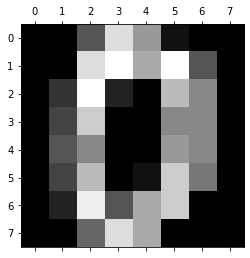

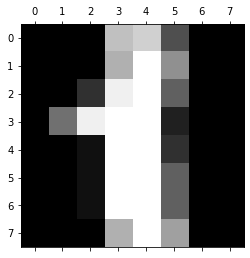

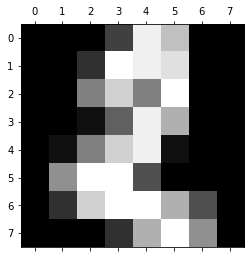

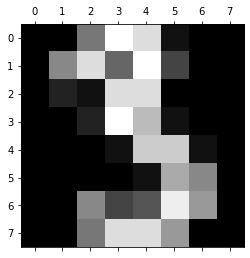

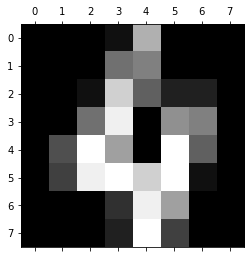

In [11]:
# this is an array of 8X8
# plot image of first five samples
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [14]:
#check first five targets
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [15]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [20]:
len(X_train)

1437

In [21]:
len(X_test)

360

In [23]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()

In [24]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
model.score(X_test,y_test)

0.9555555555555556

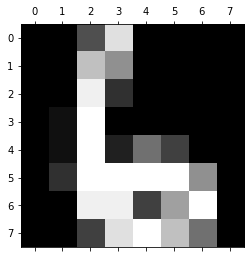

In [28]:
#picking up a random sample
plt.matshow(digits.images[67])

In [29]:
digits.target[67]

6

In [31]:
model.predict([digits.data[67]])

array([6])

In [35]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [38]:
y_predicted=model.predict(X_test)

In [47]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 35,  0,  0,  0,  0,  0,  1],
       [ 0,  2,  0,  0, 27,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 31,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 29,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 32,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0, 31]], dtype=int64)

Text(33.0, 0.5, 'Truth')

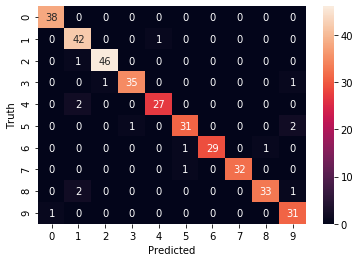

In [48]:
#visualize confusion matrix by heatmap
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')